In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

histplot,ax = plt.subplots(1, 1, figsize=(10,4))
sns.distplot(sns.load_dataset('tips').tip, kde=False, ax=ax)
ax.set_title('Distribution of tip given')

ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(16)
    
for item in ax.get_yticklabels()+ax.get_xticklabels():
    item.set_fontsize(12)    

# Python plotting
### A modern approach with Pandas and Seaborn

*Andreas Bjerre-Nielsen*

# Recap
*What have we learned about basic Python?*

-

- 

# Agenda

1. Basic exploratory plots with Pandas and Seaborn.
    - plots for single variables (histograms etc.)
    - plots for relationship between two or more variables (box, scatter, etc.)
2. Making explanatory plots useful and beautiful 

# Understanding plotting

## What values do A,B,C,D have?
<center><img src='https://raw.githubusercontent.com/abjer/sds/master/slides/figures/excel1.png'></center>

## The shocking answer
<center><img src='https://raw.githubusercontent.com/abjer/sds/master/slides/figures/excel2.png'></center>


## What are you trying to accomplish?

1. Who's the audience?
  - Exploratory (use defaults) vs. explanatory (customize)
  - Raw data vs. model results 
  - Data type: numerical vs. non-numeric (categorical)
2. Graphs should be self explanatory
3. A graph is a narrative - should convey key point(s)


# Analysis preparation

## Getting prepared (1)

*How do we start our analysis?*

We first load the relevant modules

In [ ]:
import matplotlib.pyplot as plt # fundamental plotting
import numpy as np # matrix framework like matlab
import pandas as pd
import seaborn as sns # high level plotting

# allow printing in notebook:
%matplotlib inline 

## Getting prepared (2)

*How do we load some data?*

We load a standard dataset: tips.

In [ ]:
tips = sns.load_dataset('tips')

## Getting prepared (3)

*How do we see what is in the DataFrame?*

We get preview as follows:

In [17]:
tips#.head()

Quiz: which variables/columns are available in the tips DataFrame?

We can also see this with the `columns` method: tips.column

# DataFrame structures

## Table format

*How do we define a tidy/long table?*

One row for each observation:

<center><img src='https://raw.githubusercontent.com/abjer/sds/master/slides/figures/tidy.png'></center>

Quiz: *Is our DataFrame, `tips`, in wide format? Why is tidy smart?*

## Plotting format

When plotting data there are two canonical formats: numeric and categorical. 

- Have different plotting techniques. 
- Note: numeric data can be binned and be regarded as categorical. 

# Case: Plotting one numerical variable

## From exploratory to final output
*How do we plot the distribution of numerical variables?*

We often use the histogram. Let's see what it is:

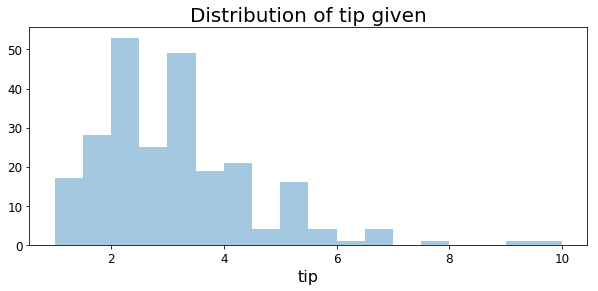

In [4]:
histplot

## Choosing your tool

In this course you will be exposed to several ways of plotting. All tools have their advantages.

Our options:

- the fundamental and flexible ~ matplotlib

- quick and dirty for wide format ~ pandas

- a smart choice for long (i.e. tidy) format~ seaborn

## Histogram with matplotlib
We will begin with the fundamental and flexible way. An old-school way of doing things. 

(array([ 41.,  79.,  66.,  27.,  19.,   5.,   4.,   1.,   1.,   1.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

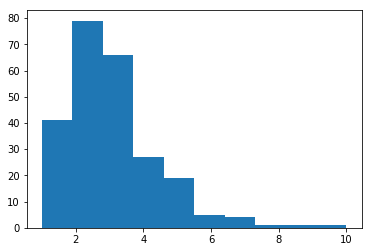

In [18]:
f,ax = plt.subplots() # create placeholder for plot
ax.hist(tips.tip) # make plot

What might we change about this?

## Histogram - pandas
Pandas has a quick and dirty implemention. Let's try the code below.

In [ ]:
tips.plot(y=['tip'], kind='hist')

## Histogram - seaborn


In [ ]:
sns.set() # seaborn default

In [ ]:
sns.distplot(tips.tip) # make plot

What is the line?

## Summing up


Group discussion (2 minutes): 
- How did our tools perform? 
    - Seaborn best immediate plot.
- Which one seems most adequate for exploratory analysis? Which one for explanatory?
    - Seaborn seems best for exploratory. 
    - Matplotlib but requires much work with customizations.
- Which steps could be taken towards improving the Seaborn histogram?
    - Size, add title, bins of histogram, font of labels/title/axis ticks

## Explanatory plotting: the histogram

*What can be done change this histogram?*

- How can we achieve the improvements?

Changing the figure size

In [ ]:
f,ax = plt.subplots(figsize=(12,4)) # set the plot size
sns.distplot(a=tips.tip, 
             ax=ax) # use matplotlib defined plot for size) 

Set title 

In [ ]:
f,ax = plt.subplots(figsize=(12,4)) 
sns.distplot(a=tips.tip, 
             ax=ax) 
ax.set_title('Distribution of tips') # setting the title

Change bounds for x- and y-axis

In [ ]:
f,ax = plt.subplots(figsize=(12,4)) 
sns.distplot(a=tips.tip, 
             ax=ax) 
ax.set_title('Distribution of tips') 
ax.set_xlim(0,10) # set limits for x-axis
ax.set_ylim(0,.5) # set limits for y-axis

Add observation rug and legend

In [ ]:
f,ax = plt.subplots(figsize=(12,4)) 
sns.distplot(a=tips.tip, 
             ax=ax, 
             rug=True,
             kde_kws={'label': 'KDE'}, # label for KDE plot
             hist_kws={'label': 'Histogram'}) # label for histogram
ax.set_title('Distribution of tips')
ax.set_xlim(0,10) 
ax.set_ylim(0,.5)

Set font sizes

In [ ]:
f,ax = plt.subplots(figsize=(12,4)) 
sns.distplot(a=tips.tip, ax=ax, 
             kde_kws={'label': 'KDE'}, 
             hist_kws={'label': 'Histogram'}) 
ax.set_title('Distribution of tips') 
ax.set_xlim(0,10) 
ax.set_ylim(0,.5)

# set font sizes
ax.title.set_fontsize(20) # title
ax.xaxis.label.set_fontsize(16)  #xaxis label  
tick_labels = ax.get_yticklabels()+ax.get_xticklabels()
for item in tick_labels: # axis tickers
    item.set_fontsize(14)
plt.setp(plt.gca().get_legend().get_texts(), fontsize='14') # legend labels

The final plot 

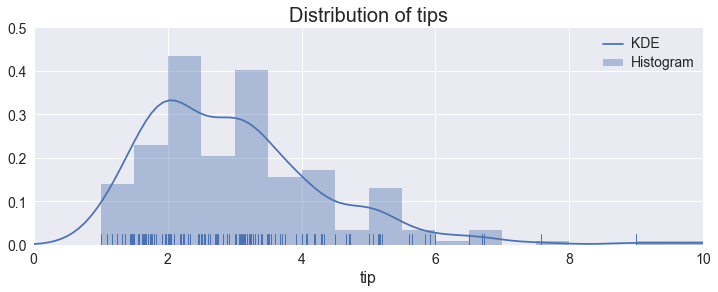

In [48]:
f

Explanation for the final plot 

In [ ]:
f,ax = plt.subplots(figsize=(12,4)) # set the plot size
sns.distplot(a=tips.tip, 
             ax=ax, # use matplotlib defined plot for size
             rug=True, # include raw count
             kde_kws={'label': 'KDE'}, # label for KDE plot
             hist_kws={'label': 'Histogram'}) # label for histogram
ax.set_title('Distribution of tips') # set title
ax.set_xlim(0,10) # set x limits
ax.set_ylim(0,.5) # set x limits

# set font sizes
ax.title.set_fontsize(20) # title
ax.xaxis.label.set_fontsize(16)  #xaxis label  
for item in ax.get_yticklabels()+ax.get_xticklabels(): # xaxis tickers
    item.set_fontsize(14)
plt.setp(plt.gca().get_legend().get_texts(), fontsize='14') # legend labels

Setting - standard plot size

In [31]:
plt.rcParams['figure.figsize'] = 12,5

# Univariate categorical data
*What if we have categorical data?*

What is categorical data? Example gender count:

In [ ]:
count_sex = tips.sex.value_counts()
count_sex

Let's plot this with bars:

In [ ]:
count_sex.plot.bar()

Let's plot this as a pie:

In [ ]:
count_sex.plot.pie()

# Univariate series plots

## Simulating data

Let's create some data

In [ ]:
np.random.seed(123) # set seed - then we get same random data

ts = np.random.normal(0,1,[1000,3]) # time series with no slope

dates = pd.date_range(start='20170801', periods=1000, freq='D') # 1000 daily observations beginning Aug 1, 17

## Simulating data (2)

We use our data to create a DataFrame with a time series index.

In [9]:
df_norm = pd.DataFrame(data=ts, # our data
                       index=dates, # our date indices
                       columns=['A', 'B', "C"]) # column names

df = df_norm.cumsum() # use cumulative sum


df['A'] += np.arange(0,60,.06) # add-to 'A' a linear trend with .06 increments
df['B'] += np.arange(0,30,.03) # add-to 'B' a linear trend with .03 increments

Quiz: is our data in long or wide format?

## Power of Pandas
*Why is pandas used in fin-tech so much?*


Example: Plotting time series for one variable (e.g. GDP, inflation)

In [ ]:
df.A.plot()

# Scatter and related plots

Raw distribution of two numeric variables

## Pandas scatter plot

Quiz: How might we alter the scatter plot?

- Let's try to change the colors of the dots:

In [ ]:
df.plot.scatter(x='A',y='B', c='C')

## Seaborn for scatter and related

The jointplot for scatter

In [ ]:
sns.jointplot('A', 'B', data=df, kind='hexbin')

How can we modify this? KDE, hexbin?

* The regression plot

In [ ]:
sns.lmplot('A' ,'B', data=df)

* Multiple scatterplots (correlation matrix style)

In [ ]:
sns.pairplot(df)

# Plotting multiple variables 
## *Wide formatting*

Which tool should we pick for wide data?

Pandas!

## Histogram 

## Time series plot

## The boxplot

Measure: median + top,bottom for quartiles and deciles.

# Plotting multiple variables 
### *Using long format*

What was long format? (one row per observation) 

What columns can we use as extra info? Categorical variables?

Let's make a boxplot of tips - distinguish by smoker:

In [ ]:
sns.boxplot(y='tip', x='smoker', data=tips)

Let's try a barplot of tips. Distinguish in addition by gender:

In [ ]:
sns.barplot(x='sex', y='tip', data=tips)

# Data exploration

### The FacetGrid

In [ ]:
g = sns.FacetGrid(tips)
g = g.map(sns.regplot, 'total_bill', 'tip')

Let's try to add gender distinctive slopes

In [ ]:
g = sns.FacetGrid(tips, col = 'sex')
g = g.map(sns.regplot, 'total_bill', 'tip')

Let's try to further add seperate estimates for smoking status 

In [ ]:
g = sns.FacetGrid(tips, col = 'smoker')
g = g.map(sns.regplot, 'total_bill', 'tip')

Can we say anything about smokers tipping behavior?

# Summing up

## Exploratory analysis

- We learned how we could leverage Pandas: 
    - data in wide format
    - time series data
- We learned that Seaborn: 
    - makes great, first visualization 
    - powerful for exploring data patterns

## Explanatory plots

- Customization is time consuming. 
- Matplotlib must be configured.

## If you want to learn more

Other useful plots can be found in the tutorials of [Seaborn](https://seaborn.pydata.org/).

To master plot making in python the tweaking with [matplotlib](https://matplotlib.org/) is essential. Worth looking into are:
- a general tutorial can be found [here](https://matplotlib.org/users/pyplot_tutorial.html);
- [subplots](https://matplotlib.org/examples/pylab_examples/subplots_demo.html) for multiple figures (with for loops);
- [color palettes](https://matplotlib.org/users/colormaps.html) for styling figures;

Plotting network and geographic data has other types of plots - see [readings](https://abjer.github.io/sds/readings/) for references to NetworkX and GeoPandas. 